<a href="https://colab.research.google.com/github/ronr762000/DIGIT_RECOGNIZER/blob/main/DIGIT_RECOGNIZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Assignment: MNIST Digit classification

This assignment will help you practice the concepts you are learning side-by-side. For this assignment, we will be working on the MNIST database. The MNIST data is a database of handwritten digits from 0 to 9. The database contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Your task is to create an ANN model for identifying the digit from the handwritten images.

In [1]:
#Load the database to variable named digit_mnist using the Keras inbuilt datasets (digit_mnist = keras.datasets.mnist)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
digit_mnist = keras.datasets.mnist

In [3]:
#Import data to create X_train_full, y_train_full, X_test and y_test variables
(X_train_full,y_train_full),(X_test,y_test)=digit_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
#Normalize the data
X_train_n=X_train_full/255.0
X_test_n=X_test/255.0

In [9]:
#Create a validation set of 6000 images
X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]

In [10]:
X_test=X_test_n

In [12]:
#Create an ANN model with two dense layers of 200 and 100 neurons
np.random.seed(101)
tf.random.set_seed(101)

In [14]:
model=keras.models.Sequential()

In [16]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [17]:
model.add(keras.layers.Dense(200,activation="relu"))

In [18]:
model.add(keras.layers.Dense(100,activation="relu"))

In [19]:
model.add(keras.layers.Dense(10,activation="softmax"))

In [21]:
#Compile and train the model for 60 epochs
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [22]:
model_history=model.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.6523 - accuracy: 0.8331 - val_loss: 0.3144 - val_accuracy: 0.9135
Epoch 2/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2926 - accuracy: 0.9165 - val_loss: 0.2514 - val_accuracy: 0.9295
Epoch 3/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2377 - accuracy: 0.9325 - val_loss: 0.2052 - val_accuracy: 0.9432
Epoch 4/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2035 - accuracy: 0.9414 - val_loss: 0.1842 - val_accuracy: 0.9490
Epoch 5/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1790 - accuracy: 0.9484 - val_loss: 0.1652 - val_accuracy: 0.9543
Epoch 6/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1588 - accuracy: 0.9545 - val_loss: 0.1502 - val_accuracy: 0.9585
Epoch 7/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1430 - accuracy: 0.9595 - val_loss: 0.1363 - val_accuracy:

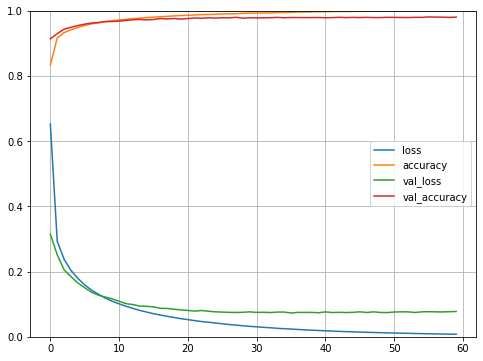

In [23]:
#Plot the loss and accuracy against epoch
pd.DataFrame(model.history.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
#Evaluate the model accuracy on the test dataset
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9800


[0.07161173224449158, 0.9800000190734863]

In [26]:
#Predict the digit for the first 5 records of the test dataset
X_new=X_test[0:5]
y_pred=model.predict(X_new)

In [27]:
y_pred.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

AxesImage(54,36;334.8x217.44)


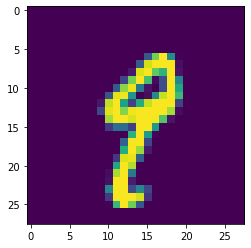

In [30]:
print(plt.imshow(X_test[78]))

In [33]:
y_test[78]

9